# Predicting Bike Rentals

Many American cities have communal bike sharing stations where you can rent bicycles by the hour or day. Washington, D.C. is one of these cities. The District collects detailed data on the number of bicycles people rent by the hour and day.

The file contains 17380 rows, with each row representing the number of bike rentals for a single hour of a single day.

Here are the descriptions for the relevant columns:

- instant - A unique sequential ID number for each row
- dteday - The date of the rentals
- season - The season in which the rentals occurred
- yr - The year the rentals occurred
- mnth - The month the rentals occurred
- hr - The hour the rentals occurred
- holiday - Whether or not the day was a holiday
- weekday - The day of the week (as a number, 0 to 7)
- workingday - Whether or not the day was a working day
- weathersit - The weather (as a categorical variable)
- temp - The temperature, on a 0-1 scale
- atemp - The adjusted temperature
- hum - The humidity, on a 0-1 scale
- windspeed - The wind speed, on a 0-1 scale
- casual - The number of casual riders (people who hadn't previously signed up with the bike sharing program)
- registered - The number of registered riders (people who had already signed up)
- cnt - The total number of bike rentals (casual + registered)

we'll try to predict the total number of bikes people rented in a given hour. we'll predict the `cnt` column using all of the other columns, except for casual and registered.

In [1]:
# Introduction to the dataset
import pandas as pd

bike_rentals = pd.read_csv('bike_rental_hour.csv')
bike_rentals.head(5)

instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1   0        0        6           0   
1        2  2011-01-01       1   0     1   1        0        6           0   
2        3  2011-01-01       1   0     1   2        0        6           0   
3        4  2011-01-01       1   0     1   3        0        6           0   
4        5  2011-01-01       1   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0           1  0.24  0.2879  0.81        0.0       3          13   16  
1           1  0.22  0.2727  0.80        0.0       8          32   40  
2           1  0.22  0.2727  0.80        0.0       5          27   32  
3           1  0.24  0.2879  0.75        0.0       3          10   13  
4           1  0.24  0.2879  0.75        0.0       0           1    1

(array([6972., 3705., 2659., 1660.,  987.,  663.,  369.,  188.,  139.,
          37.]),
 array([  1. ,  98.6, 196.2, 293.8, 391.4, 489. , 586.6, 684.2, 781.8,
        879.4, 977. ]),
 <a list of 10 Patch objects>)

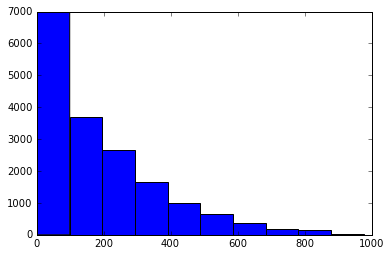

In [2]:
# Make the histogram of the `cnt` column 
%matplotlib inline

import matplotlib.pyplot as plt

plt.hist(bike_rentals['cnt'])

In [3]:
# Use `corr` method on dataframe to 
# explore each column is correlated with `cnt`
bike_rentals.corr()['cnt'].sort_values(ascending=False)

cnt           1.000000
registered    0.972151
casual        0.694564
temp          0.404772
atemp         0.400929
hr            0.394071
instant       0.278379
yr            0.250495
season        0.178056
mnth          0.120638
windspeed     0.093234
workingday    0.030284
weekday       0.026900
holiday      -0.030927
weathersit   -0.142426
hum          -0.322911
Name: cnt, dtype: float64

## Calculating Features

The `hr` column in bike_rentals contains the hours during which bikes are rented, from `1` to `24`. A machine will treat each hour differently, without understanding that certain hours are related. We can introduce some order into the process by creating a new column with labels for morning, afternoon, evening, and night. This will bundle similar times together, enabling the model to make better decisions.

In [4]:
def assign_label(hour):
    if 0 <= hour < 6:
        return 4
    elif 6 <= hour < 12:
        return 1
    elif 12 <= hour < 18:
        return 2
    elif 18 <= hour < 24:
        return 3
    
bike_rentals['time_label'] = bike_rentals['hr'].apply(assign_label)
bike_rentals.head(5)

instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1   0        0        6           0   
1        2  2011-01-01       1   0     1   1        0        6           0   
2        3  2011-01-01       1   0     1   2        0        6           0   
3        4  2011-01-01       1   0     1   3        0        6           0   
4        5  2011-01-01       1   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  \
0           1  0.24  0.2879  0.81        0.0       3          13   16   
1           1  0.22  0.2727  0.80        0.0       8          32   40   
2           1  0.22  0.2727  0.80        0.0       5          27   32   
3           1  0.24  0.2879  0.75        0.0       3          10   13   
4           1  0.24  0.2879  0.75        0.0       0           1    1   

   time_label  
0           4  
1           4  
2           4  
3           4  
4           4

## Splitting the Data into Train + Test Sets

### Error metric

The mean squared error metric makes the most sense to evaluate our error. MSE works on continuous numeric data, which fits our data quite well.

In [5]:
# Select `80%` of the rows as training set
train = bike_rentals.sample(frac=0.8)
test = bike_rentals.loc[~bike_rentals.index.isin(train.index)]

print("Total: {}".format(bike_rentals.shape))
print("Train: {}".format(train.shape))
print("Test: {}".format(test.shape))

Total: (17379, 18)
Train: (13903, 18)
Test: (3476, 18)


## Applying Linear Regression

In [6]:
columns = list(train.columns)
columns.remove('cnt')
columns.remove('casual')
columns.remove('dteday')
columns.remove('registered')

columns

['instant',
 'season',
 'yr',
 'mnth',
 'hr',
 'holiday',
 'weekday',
 'workingday',
 'weathersit',
 'temp',
 'atemp',
 'hum',
 'windspeed',
 'time_label']

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lr = LinearRegression()
lr.fit(train[columns], train['cnt'])

error = mean_squared_error(test['cnt'], lr.predict(test[columns]))
error

17666.030138767204

## Error

The error is very high, which may be due to the fact that the data has a few extremely high rental counts, but otherwise mostly low counts. Larger errors are penalized more with MSE, which leads to a higher total error.

## Applying Decision Tree

In [29]:
from sklearn.tree import DecisionTreeRegressor

errors = {}
for i in range(1, 8):
    dtr = DecisionTreeRegressor(min_samples_leaf=i)
    dtr.fit(train[columns], train['cnt'])

    error = mean_squared_error(test['cnt'], dtr.predict(test[columns]))
    errors[i] = error
    
errors

{1: 3818.2428078250864,
 2: 3282.8274277585983,
 3: 2901.210413789797,
 4: 2685.847290679985,
 5: 2714.8183976337596,
 6: 2888.0880909622983,
 7: 2866.847386195373}

## Decision tree error

By taking the nonlinear predictors into account, the decision tree regressor appears to have much higher accuracy than linear regression.

## Applying Random Forest

In [33]:
from sklearn.ensemble import RandomForestRegressor

errors = {}
for i in range(1, 8):
    dtr = RandomForestRegressor(min_samples_leaf=i)
    dtr.fit(train[columns], train['cnt'])
    error = mean_squared_error(test['cnt'], dtr.predict(test[columns]))
    errors[i] = error
errors

{1: 1869.34665995397,
 2: 1859.256873930941,
 3: 1910.8536091934975,
 4: 1907.6897113120203,
 5: 1958.3956647258663,
 6: 1963.8204720556057,
 7: 2108.210498804909}

## Random forest error
By removing some of the sources of overfitting, the random forest accuracy is improved over the decision tree accuracy.